In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read data from a CSV file
myData = pd.read_csv('MBA_data.csv')

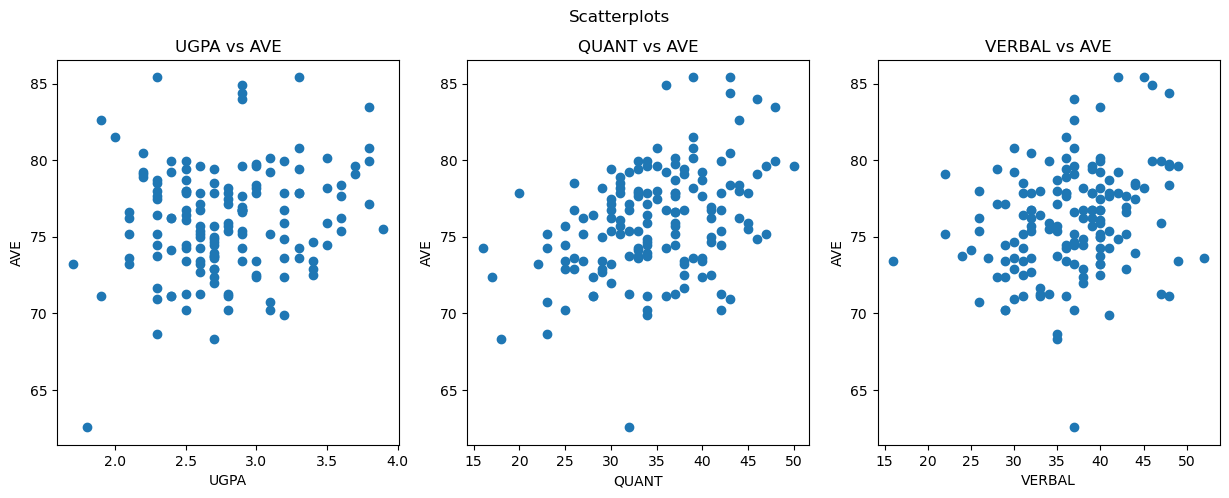

In [2]:
# Scatterplots to check for linearity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Scatterplots")

axes[0].scatter(myData['UGPA'], myData['AVE'])
axes[0].set_title("UGPA vs AVE")
axes[0].set_xlabel("UGPA")
axes[0].set_ylabel("AVE")

axes[1].scatter(myData['QUANT'], myData['AVE'])
axes[1].set_title("QUANT vs AVE")
axes[1].set_xlabel("QUANT")
axes[1].set_ylabel("AVE")

axes[2].scatter(myData['VERBAL'], myData['AVE'])
axes[2].set_title("VERBAL vs AVE")
axes[2].set_xlabel("VERBAL")
axes[2].set_ylabel("AVE")

plt.show()

In [3]:
# Run multiple linear regression
X = myData[['UGPA', 'QUANT', 'VERBAL']]
X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(myData['AVE'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AVE   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     12.68
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           2.07e-07
Time:                        17:12:50   Log-Likelihood:                -384.99
No. Observations:                 150   AIC:                             778.0
Df Residuals:                     146   BIC:                             790.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.1252      2.346     26.908      0.0

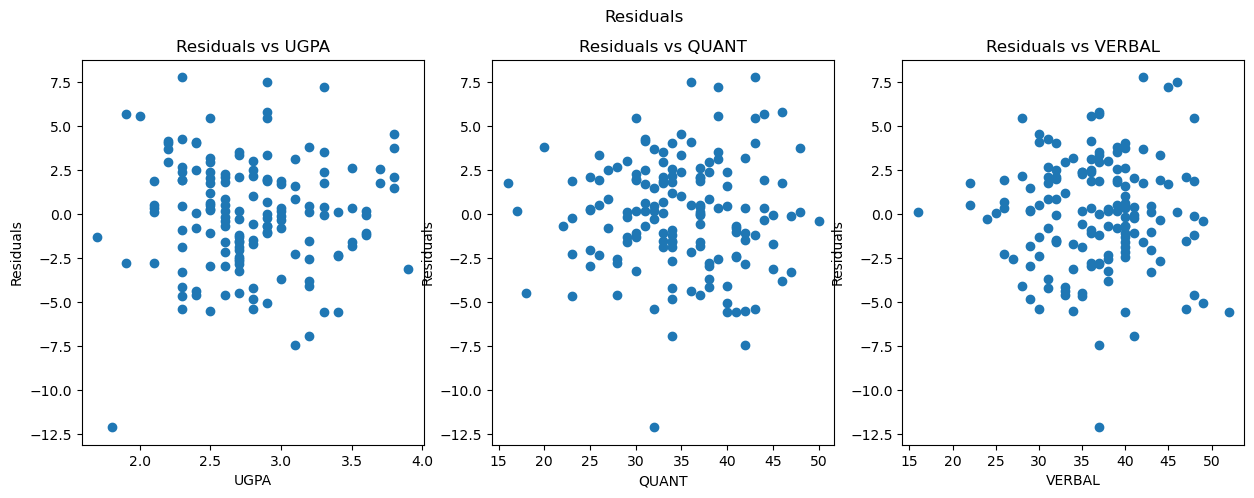

In [4]:
# Compute residuals
Y_hat = model.predict(X)
residuals = myData['AVE'] - Y_hat

# Visualize residuals
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Residuals")

axes[0].scatter(myData['UGPA'], residuals)
axes[0].set_title("Residuals vs UGPA")
axes[0].set_xlabel("UGPA")
axes[0].set_ylabel("Residuals")

axes[1].scatter(myData['QUANT'], residuals)
axes[1].set_title("Residuals vs QUANT")
axes[1].set_xlabel("QUANT")
axes[1].set_ylabel("Residuals")

axes[2].scatter(myData['VERBAL'], residuals)
axes[2].set_title("Residuals vs VERBAL")
axes[2].set_xlabel("VERBAL")
axes[2].set_ylabel("Residuals")

plt.show()

In [29]:
# Predictions can be made with the predict method
my_newdata = pd.DataFrame({'UGPA': [3, 3, 3.75], 'QUANT': [35, 45, 25], 'VERBAL': [35, 30, 50]})
print(my_newdata)
X_new = sm.add_constant(my_newdata)
prediction_object = model.get_prediction(exog=X_new)
predictions = prediction_object.summary_frame(alpha=0.05)
display(predictions)

   UGPA  QUANT  VERBAL
0  3.00     35      35
1  3.00     45      30
2  3.75     25      50


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,76.101899,0.296923,75.515077,76.688720,69.762981,82.440816
1,77.352070,0.590040,76.185946,78.518193,70.933553,83.770587
2,76.658245,0.970827,74.739554,78.576935,70.061360,83.255129


In [30]:
## Print standard error of predictions
se_pred = prediction_object.se_obs
print(se_pred)

[3.20739313 3.24766918 3.33792054]
